## CNN_MNIST 数据集

### 加载数据

In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [82]:
x_train.shape

(60000, 28, 28)

In [83]:
x_test.shape

(10000, 28, 28)

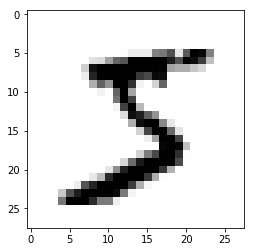

In [84]:
x_train[0]
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### 数据的归一化处理
- 作用：将数据变为0-1之间
- 目的

In [85]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

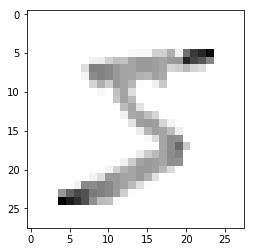

In [86]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### 构建模型
- 构建顺序模型

In [87]:
model=tf.keras.models.Sequential()

- 数据扁平化

In [88]:
model.add(tf.keras.layers.Flatten())

- 添加隐层 全连接层

In [89]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [90]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [91]:
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [92]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2625 - accuracy: 0.9229
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1084 - accuracy: 0.9665
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0763 - accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0547 - accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0425 - accuracy: 0.9863
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0335 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0265 - accuracy: 0.9909
Epoch 8/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0209 - accuracy: 0.9932
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0183 - accuracy: 0.9937
Epoch 10/10
60

In [109]:
val_loss,val_acc=model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [95]:
val_acc

0.9778

### 测试集测试

In [110]:
predictions=model.predict(x_test)
predictions[0]

array([6.2560045e-15, 1.6948382e-16, 1.4146666e-10, 6.5994946e-08,
       2.0894066e-17, 9.5751425e-15, 4.8476897e-23, 9.9999988e-01,
       2.1680369e-16, 2.7016319e-12], dtype=float32)

In [111]:
len(predictions[1])

10

In [112]:
np.argmax(predictions[1])

2

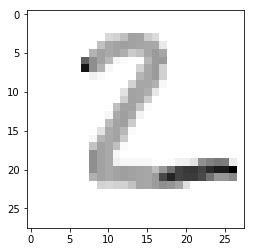

In [113]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()